# Credit Card Fraud Detection

* SMOTE is used for handle the extreme class imbalance.
* XGBoost is used for training the fraud detection classifier.
* Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud


## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/creditcard.csv')
print(df.shape)

df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [3]:
df.isna().sum() / df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [4]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Transaction amount & time

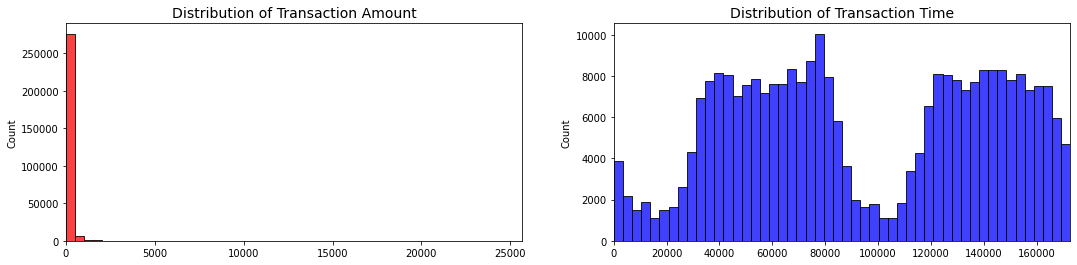

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', bins=50)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b', bins=50)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Correlation matrix

In [6]:
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0]

fraud_df.shape, non_fraud_df.shape

((492, 31), (284315, 31))

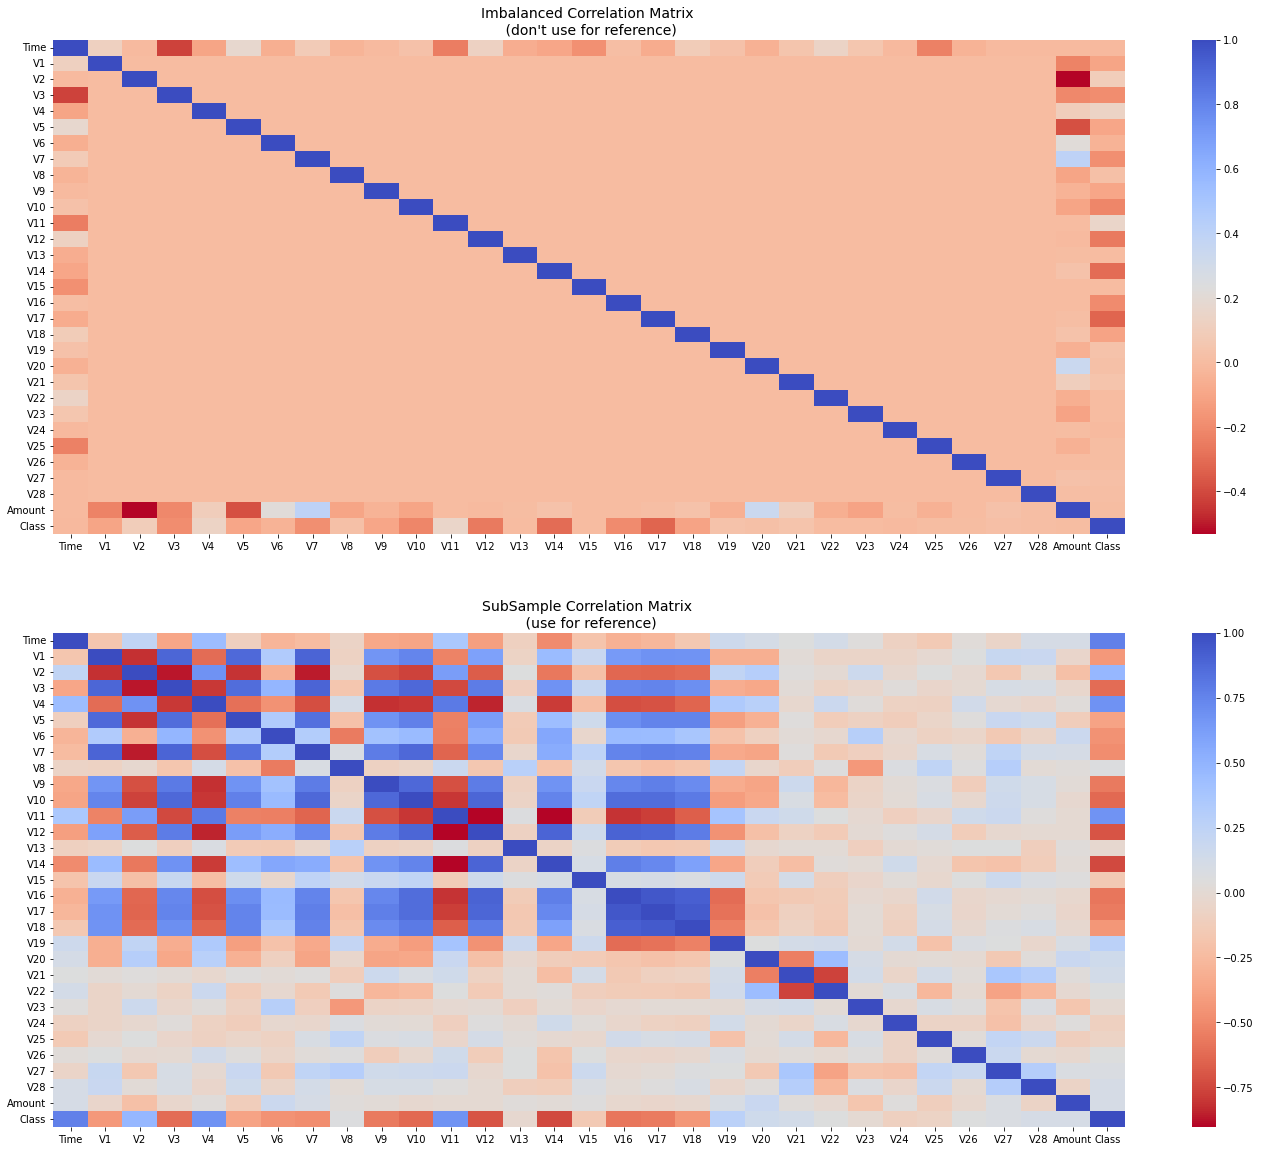

In [7]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

balanced_df = pd.concat([fraud_df, non_fraud_df[:fraud_df.shape[0]]])
sub_sample_corr = balanced_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Observations:
* Features positively correlated with Class: Time, V2, V4, V11, V19.
* Features negatively correlated with Class: V1, V3, V5, V6, V7, V9, V10, V12, V14, V16, V17, V18

### Positively correlated features

In [8]:
colors = ["#0101DF", "#DF0101"]

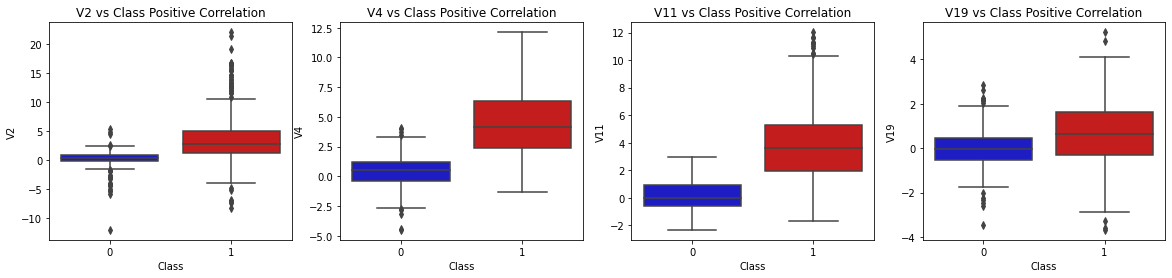

In [9]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V2", data=balanced_df, palette=colors, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=balanced_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=balanced_df, palette=colors, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=balanced_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

### Negatively correlated features

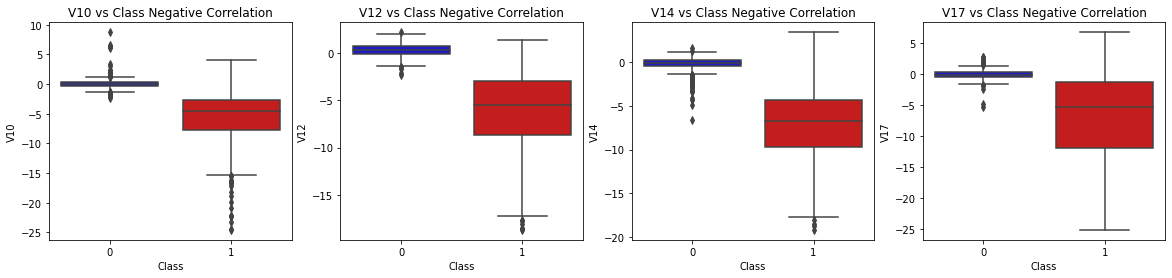

In [10]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V10", data=balanced_df, palette=colors, ax=axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=balanced_df, palette=colors, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V14", data=balanced_df, palette=colors, ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V17", data=balanced_df, palette=colors, ax=axes[3])
axes[3].set_title('V17 vs Class Negative Correlation')

plt.show()

## Model Training

### Split data

In [11]:
from sklearn.model_selection import train_test_split


X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(199364, 30)
(199364,)
(85443, 30)
(85443,)


### Scale features

In [12]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Upsampling

In [13]:
from imblearn.over_sampling import SMOTE 


sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

X_train_sm.shape, y_train_sm.shape

((398040, 30), (398040,))

### Model training

In [14]:
y_train_sm.value_counts()

0    199020
1    199020
Name: Class, dtype: int64

In [15]:
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [16]:
import time
from xgboost import XGBClassifier

clf = XGBClassifier(
    objective='binary:logistic',
    n_estimators=1000, 
    learning_rate=0.1,
)

start_time = time.time()
clf.fit(
    X_train_sm, y_train_sm,
    early_stopping_rounds=50,
    eval_metric="auc",
    eval_set=[(X_test_scaled, y_test)],
    verbose=True
)
print(f"Elapsed time: {round(time.time() - start_time, 4)} seconds ...")

/home/shenghao/Desktop/Debugging/shenghao-blogs-work/julia-traditional-ml/julia-traidtional-ml-env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/shenghao/Desktop/Debugging/shenghao-blogs-work/julia-traditional-ml/julia-traidtional-ml-env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.94164
[1]	validation_0-auc:0.95178
[2]	validation_0-auc:0.95169
[3]	validation_0-auc:0.95588
[4]	validation_0-auc:0.95561
[5]	validation_0-auc:0.95410
[6]	validation_0-auc:0.95121
[7]	validation_0-auc:0.94848
[8]	validation_0-auc:0.94826
[9]	validation_0-auc:0.95091
[10]	validation_0-auc:0.96018
[11]	validation_0-auc:0.95861
[12]	validation_0-auc:0.95899
[13]	validation_0-auc:0.96183
[14]	validation_0-auc:0.96300
[15]	validation_0-auc:0.96591
[16]	validation_0-auc:0.96739
[17]	validation_0-auc:0.96851
[18]	validation_0-auc:0.96895
[19]	validation_0-auc:0.96871
[20]	validation_0-auc:0.96814
[21]	validation_0-auc:0.96846
[22]	validation_0-auc:0.96841
[23]	validation_0-auc:0.96792
[24]	validation_0-auc:0.96754
[25]	validation_0-auc:0.96773
[26]	validation_0-auc:0.96773
[27]	validation_0-auc:0.96763
[28]	validation_0-auc:0.96737
[29]	validation_0-auc:0.96750
[30]	validation_0-auc:0.96737
[31]	validation_0-auc:0.96741
[32]	validation_0-auc:0.96704
[33]	validation_0-au

### Model evaluation

`40.7139` seconds was spent on training the model (68 iterations).

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score


y_pred_proba = clf.predict_proba(X_test_scaled)

auc = roc_auc_score(y_test, y_pred_proba[:, 1])
aucpr = average_precision_score(y_test, y_pred_proba[:, 1])
print("ROC-AUC-Test: " + str(round(auc, 4)))
print("PR-AUC-Test: " + str(round(aucpr, 4)))
print("-----------------------------------------------------------\n")

ROC-AUC-Test: 0.9689
PR-AUC-Test: 0.685
-----------------------------------------------------------



In [18]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score
)

y_pred = clf.predict(X_test_scaled)

print(f"Precision score: {round(precision_score(y_test, y_pred), 4)}")
print(f"Recall score: {round(recall_score(y_test, y_pred), 4)}")
print(f"F1 score: {round(f1_score(y_test, y_pred), 4)}")

Precision score: 0.1175
Recall score: 0.8514
F1 score: 0.2066


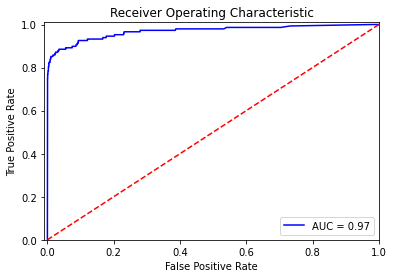

In [19]:
from sklearn.metrics import (
    roc_curve, auc
)

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Export Python Model

In [20]:
import pickle
import joblib


model_save_name = "models/fraud_detect_xgboost_py_model.joblib"
joblib.dump(clf, model_save_name)

scaler_save_name = "models/fraud_detect_py_scaler.pkl"
with open (scaler_save_name, 'wb') as f:
    pickle.dump(scaler, f)

## References


### Credit Fraud || Dealing with Imbalanced Datasets

https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook